firs we will generate the data


Part A.a

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
import random
import matplotlib.pyplot as plt

X = []
Y = []
data = []
labels = []

for i in range(-100,101):
  X.append(i/100)
  Y.append(i/100)

for i in range(201):
  for j in range(201):
    data.append([X[i],Y[j],1]) #we also add bias

random.shuffle(data)

for d in data:
  if d[0]>0.5 and d[1]>0.5:
    labels.append(1)
  else:
    labels.append(-1)

# print(data)
# print(labels)

divide into train and test, 70% train and 30% test

In [2]:
train_set_x = []
train_set_y = []
test_set_x = []
test_set_y = []
divide_train_test = 0.7

for i in range(40401):
  if i < 40401*divide_train_test:
    train_set_x.append(data[i])
    train_set_y.append(labels[i])
  else:
    test_set_x.append(data[i])
    test_set_y.append(labels[i])

print(len(train_set_x))
print(len(test_set_x))

28281
12120


train the model

In [3]:
train_set_x = np.array(train_set_x)
train_set_y = np.array(train_set_y)
test_set_x = np.array(test_set_x)
test_set_y = np.array(test_set_y)
Errors = []

(number_of_rows, number_of_cols) = train_set_x.shape

np.random.seed(1)

# we initiate weights with random values
W = np.random.random((3,))-1 

lr = 0.001
for iter in range(1):
  for input,desired in zip(train_set_x,train_set_y):
    adaline_output = (input[0]*W[0])+(input[1]*W[1])+(input[2]*W[2])
    if adaline_output > 0 :
      adaline_output = 1
    else:
      adaline_output = -1
    Error = desired - adaline_output
    Errors.append(Error)
    W[0] = W[0] + lr*Error*input[0]
    W[1] = W[1] + lr*Error*input[1]
    W[2] = W[2] + lr*Error*input[2]

predict

In [4]:
(number_of_rows, number_of_cols) = test_set_x.shape
# test_set_x = np.c_[test_set_x,np.ones(number_of_rows)]
predicted_y = np.arange(number_of_rows)
predicts = []

for i in range(number_of_rows):
  if np.dot(W, test_set_x[i]) > 0:
    predicted_y[i] = 1
    predicts.append(1)
  else:
    predicted_y[i] = -1
    predicts.append(-1)

predicted_y = np.array(predicted_y)

In [ ]:
# print(predicted_y)
# print(test_set_y)
# print(Errors)

show the error graph

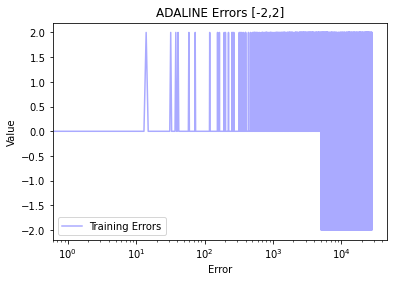

In [5]:
ax = plt.subplot(111)
ax.plot(Errors, c='#aaaaff', label='Training Errors')
ax.set_xscale("log")
plt.title("ADALINE Errors [-2,2]")
plt.legend()
plt.xlabel('Error')
plt.ylabel('Value')
plt.show()


See if the predictions graph and Real labels graph looks similar

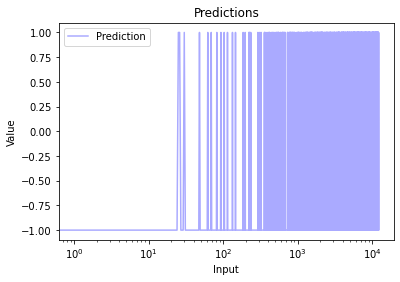

In [6]:
ax = plt.subplot(111)
ax.plot(predicts, c='#aaaaff', label='Prediction')
ax.set_xscale("log")
plt.title("Predictions")
plt.legend()
plt.xlabel('Input')
plt.ylabel('Value')
plt.show()

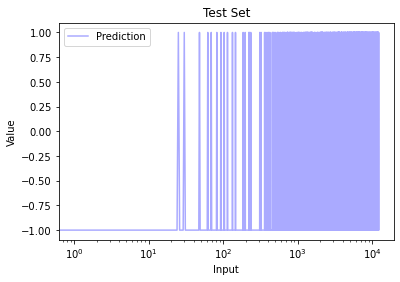

In [7]:
ax = plt.subplot(111)
ax.plot(test_set_y, c='#aaaaff', label='Prediction')
ax.set_xscale("log")
plt.title("Test Set")
plt.legend()
plt.xlabel('Input')
plt.ylabel('Value')
plt.show()

Where all points of the prediction should be (in the right up corner).

(-1.0, 1.0)

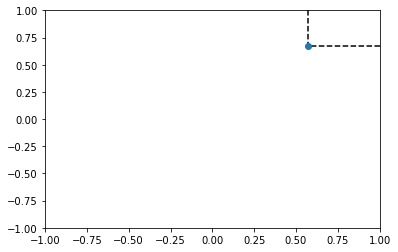

In [8]:
show_test = []
for i in test_set_x:
  if i[0] >0.5 and i[1] > 0.5:
    show_test.append(i)
plt.vlines(min(show_test[0]),1,min(show_test[1]),linestyle="dashed")
plt.hlines(min(show_test[1]),1,min(show_test[0]),linestyle="dashed")
plt.scatter(min(show_test[0]), min(show_test[1]), zorder=2)
plt.xlim([-1,1])
plt.ylim([-1,1])

(-1.0, 1.0)

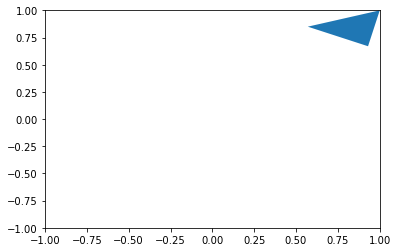

In [9]:
show_predict = []
for i in range(len(test_set_y)):
  if test_set_y[i] == 1 and test_set_y[i] == predicts[i]:
    show_predict.append(test_set_x[i])
plt.fill(show_predict[0],show_predict[1],"o")
plt.xlim([-1,1])
plt.ylim([-1,1])

See how good is our model for this problem

In [10]:
c=0
for i in range(len(test_set_y)):
  if predicts[i] == test_set_y[i]:
    c+=1

c = c/len(test_set_y)
print ("the model has %s success rate" %c)

the model has 0.9787128712871287 success rate


we want the intersection between red and blue.

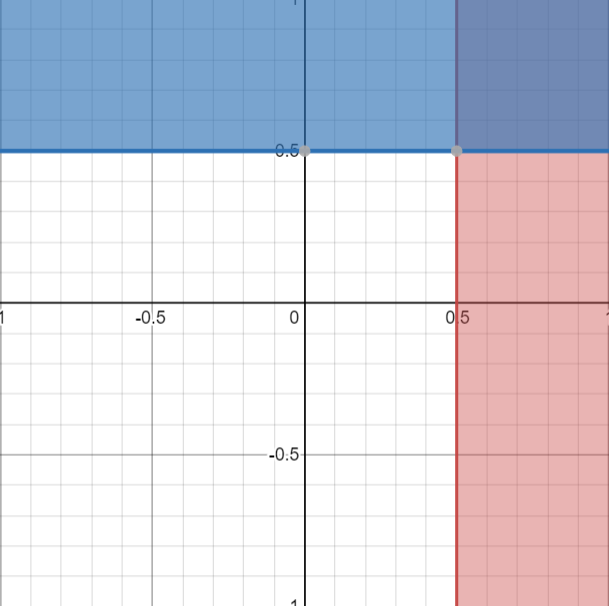

Part A.b

We makes more data to see if our model improves, not 10000 because we dont have enough memory.

In [11]:
X = []
Y = []
data = []
labels = []

for i in range(-1000,1001):
  X.append(i/1000)
  Y.append(i/1000)

for i in range(2001):
  for j in range(2001):
    data.append([X[i],Y[j],1])

random.shuffle(data)

for d in data:
  if d[0]>0.5 and d[1]>0.5:
    labels.append(1)
  else:
    labels.append(-1)

# print(data)
# print(labels)

In [12]:
train_set_x = []
train_set_y = []
test_set_x = []
test_set_y = []
divide_train_test = 0.7

for i in range(4004001):
  if i < 40401*divide_train_test:
    train_set_x.append(data[i])
    train_set_y.append(labels[i])
  else:
    test_set_x.append(data[i])
    test_set_y.append(labels[i])

print(len(train_set_x))
print(len(test_set_x))

28281
3975720


In [13]:
train_set_x = np.array(train_set_x)
train_set_y = np.array(train_set_y)
test_set_x = np.array(test_set_x)
test_set_y = np.array(test_set_y)
Errors = []

(number_of_rows, number_of_cols) = train_set_x.shape

np.random.seed(1)

# we initiate weights with random values
W = np.random.random((3,))*-1 

lr = 0.001
for iter in range(1):
  for input,desired in zip(train_set_x,train_set_y):
    adaline_output = (input[0]*W[0])+(input[1]*W[1])+(input[2]*W[2])
    if adaline_output > 0 :
      adaline_output = 1
    else:
      adaline_output = -1
    Error = desired - adaline_output
    Errors.append(Error)
    W[0] = W[0] + lr*Error*input[0]
    W[1] = W[1] + lr*Error*input[1]
    W[2] = W[2] + lr*Error*input[2]

In [14]:
(number_of_rows, number_of_cols) = test_set_x.shape
# test_set_x = np.c_[test_set_x,np.ones(number_of_rows)]
predicted_y = np.arange(number_of_rows)
predicts = []

for i in range(number_of_rows):
  if np.dot(W, test_set_x[i]) > 0:
    predicted_y[i] = 1
    predicts.append(1)
  else:
    predicted_y[i] = -1
    predicts.append(-1)

predicted_y = np.array(predicted_y)

In [15]:
c=0
for i in range(len(test_set_y)):
  if predicts[i] == test_set_y[i]:
    c+=1

c = c/len(test_set_y)
print ("the model has %s success rate" %c)

the model has 0.9666221464288229 success rate


somtimes it improves it and somtimes not, so we can assume that in this problem more data isn't that helpfull.
also splitting the data doesn't effect that much on this problem since it's pretty simple problem.

Part B


In [16]:
X = []
Y = []
data = []
labels = []

for i in range(-100,101):
  X.append(i/100)
  Y.append(i/100)

for i in range(201):
  for j in range(201):
    data.append([X[i],Y[j],1]) #we also add bias

random.shuffle(data)

for d in data:
  if d[0]**2 + d[1]**2 >= 1/2 and d[0]**2 + d[1]**2 <= 3/4:
    labels.append(1)
  else:
    labels.append(-1)

# print(data)
# print(labels)

In [17]:
train_set_x = []
train_set_y = []
test_set_x = []
test_set_y = []
divide_train_test = 0.7

for i in range(40401):
  if i < 40401*divide_train_test:
    train_set_x.append(data[i])
    train_set_y.append(labels[i])
  else:
    test_set_x.append(data[i])
    test_set_y.append(labels[i])

print(len(train_set_x))
print(len(test_set_x))

28281
12120


In [18]:
train_set_x = np.array(train_set_x)
train_set_y = np.array(train_set_y)
test_set_x = np.array(test_set_x)
test_set_y = np.array(test_set_y)
Errors = []

(number_of_rows, number_of_cols) = train_set_x.shape

np.random.seed(1)

# we initiate weights with random values
W = np.random.random((3,))-1 

lr = 0.001
for iter in range(1):
  for input,desired in zip(train_set_x,train_set_y):
    adaline_output = (input[0]*W[0])+(input[1]*W[1])+(input[2]*W[2])
    if adaline_output > 0 :
      adaline_output = 1
    else:
      adaline_output = -1
    Error = desired - adaline_output
    Errors.append(Error)
    W[0] = W[0] + lr*Error*input[0]
    W[1] = W[1] + lr*Error*input[1]
    W[2] = W[2] + lr*Error*input[2]

In [19]:
(number_of_rows, number_of_cols) = test_set_x.shape
# test_set_x = np.c_[test_set_x,np.ones(number_of_rows)]
predicted_y = np.arange(number_of_rows)
predicts = []

for i in range(number_of_rows):
  if np.dot(W, test_set_x[i]) > 0:
    predicted_y[i] = 1
    predicts.append(1)
  else:
    predicted_y[i] = -1
    predicts.append(-1)

predicted_y = np.array(predicted_y)

In [20]:
c=0
for i in range(len(test_set_y)):
  if predicts[i] == test_set_y[i]:
    c+=1

c = c/len(test_set_y)
print ("the model has %s success rate" %c)

the model has 0.801980198019802 success rate


we want the intersection between red and blue.

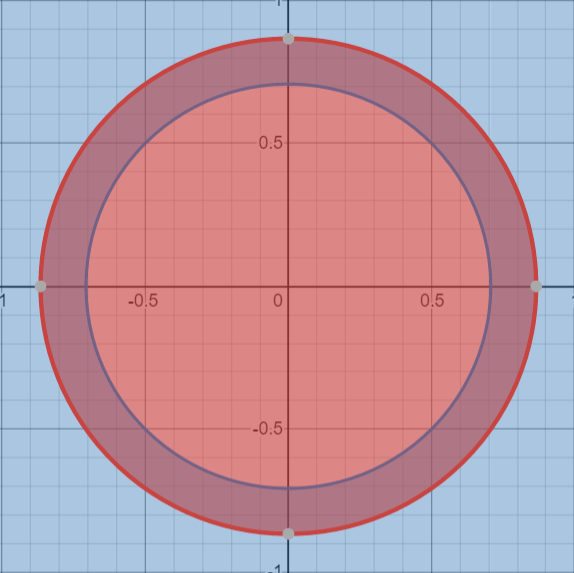

in this problem it is clearer to see that splitting the data to test and train is more important since it's more complicated problem.
we tested several splits and we think that 70% 30% gives the best results
other splits such as too much train can give overfitting so on the test we get below 80%, and too much test gives also below 80% because we didn't trained the model enough.